In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
N = 1000
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

In [2]:
def kernel_gaussian_uni(u):
    if abs(u) <= 1:
        return 1/((2*np.pi)**0.5) * np.exp(-1/2 * u**2)
    else:
        return 0

In [3]:
def parzen_window(data, h):
    
    X = np.arange(np.min(data), np.max(data), 0.01)
    N = np.size(X,0)
    d = data.shape[1]
    
    # Calculate each sample's density using this gaussian kernel
    probs = [] 
    for x in X:
        px = 1/N * 1/(np.power(h,d)) * sum([ kernel_gaussian_uni((x-di)/h) for di in data ])
        probs.append(px)
        
    return probs


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


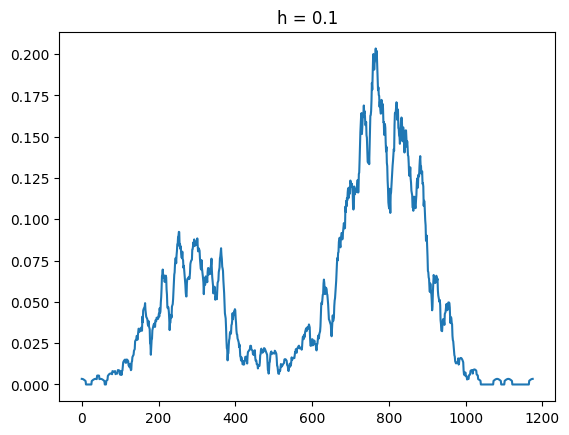

In [4]:
h = .1
probs = parzen_window(X, h)
plt.plot(probs)
plt.title( f'h = {h}');

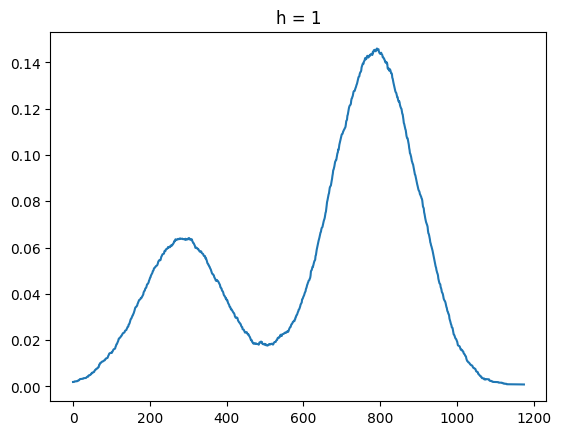

In [5]:
h = 1
probs = parzen_window(X, h)
plt.plot(probs)
plt.title( f'h = {h}');

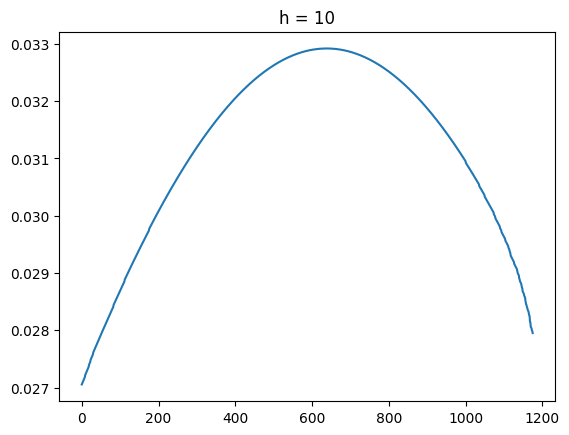

In [6]:
h = 10
probs = parzen_window(X, h)
plt.plot(probs)
plt.title( f'h = {h}');

<div style="direction:rtl"> 
    همانطور که مشاهده می‌شود هر چقد h بزرگ تر باشد توزیع smooth  تر میشود
</div>

<div style="direction:rtl">
با کوچک شدن h توزیع به شدت نویزی می‌شود به نظر می‌رسد بین این سه مقدار 1 از بقیه انتخاب بهتری است.
</div>

<div style="direction:rtl">
دقت شود در حالت یک overfitting رخ داده و در حالت سه underfitting
</div>